## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
import periodic_1_4 as me
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0/6, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

In [3]:
dimH=20
dim2s=5
VH = np.zeros(dimH)

KHHVH = np.zeros([dimH])
GH1sF = np.zeros([dimH])
GH2aT = np.zeros([dimH])

F[0] = 0.0
F[1] = 0.0 
F[2] = -1  ## gravity 

VH[0:dim2s]  = S
VH[dim2s:dim2s+3]  = D

1668.8309618299247
61.00188388878509
25.449207285128864
12.847448377006545
7.309789432944879
4.513171974650895


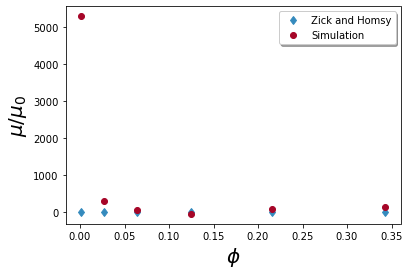

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  5297.577		 0.825	
0.027		  298.074		 0.498	
0.064		  53.458		 0.356	
0.125		  -57.069		 0.233	
0.216		  72.778		 0.134	
0.343		  127.186		 0.065	


In [4]:
# Deafult value of xi = sqrt (pi/L)

S = np.zeros(Np*5)
D = np.zeros(Np*3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    F[0] = 0.0
    F[1] = 0.0 
    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, Np, eta, L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)                 
    
    phi[i] = (4*np.pi*b**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [5]:
o

array([ 4.59469988e+01, -4.59470004e+01,  3.71268497e-05])

In [6]:
v

array([  7.29551981,   7.29551981, -40.48457844])